In [1]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


In [2]:
MODELS = {
    "vgg16": (VGG16, (224, 224)),
    "vgg19": (VGG19, (224, 224)),
    "inception": (InceptionV3, (299, 299)),
    "xception": (Xception, (299, 299)), # TensorFlow ONLY
    "resnet": (ResNet50, (224, 224))
}


In [3]:
def image_load_and_convert(image_path, model):

    pil_im = Image.open(image_path, 'r')
    imshow(np.asarray(pil_im))
    
    # initialize the input image shape 
    # and the pre-processing function (this might need to be changed
    inputShape = MODELS[model][1]
    preprocess = imagenet_utils.preprocess_input
    image = load_img(image_path, target_size=inputShape)
    image = img_to_array(image)
    # the original networks have been trained on an addiitonal
    # dimension taking into account the batch size
    # we need to add this dimension for consistency
    # even if we have one image only
    image = np.expand_dims(image, axis=0)
    image = preprocess(image)
    
    return image

In [4]:
def classify_image(image_path, model):
    img = image_load_and_convert(image_path, model)
    Network = MODELS[model][0]
    model = Network(weights="imagenet")
    preds = model.predict(img)
    P = imagenet_utils.decode_predictions(preds)
    # loop over the predictions and display the rank-5 predictions 
    # along with probabilities
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. macaw: 99.92%
2. jacamar: 0.03%
3. lorikeet: 0.02%
4. bee_eater: 0.02%
5. toucan: 0.00%


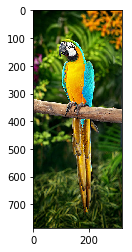

In [5]:
classify_image("images/parrot.jpg", "vgg16")

1. macaw: 99.77%
2. lorikeet: 0.07%
3. toucan: 0.06%
4. hornbill: 0.05%
5. jacamar: 0.01%


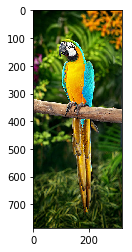

In [6]:
classify_image("images/parrot.jpg", "vgg19")

1. stopwatch: 100.00%
2. mink: 0.00%
3. hammer: 0.00%
4. black_grouse: 0.00%
5. web_site: 0.00%


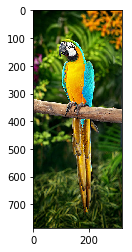

In [7]:
classify_image("images/parrot.jpg", "inception")

1. backpack: 56.69%
2. military_uniform: 29.79%
3. bib: 8.02%
4. purse: 2.14%
5. ping-pong_ball: 1.52%


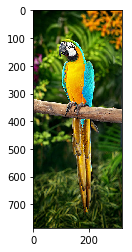

In [8]:
classify_image("images/parrot.jpg", "xception")

1. macaw: 97.93%
2. peacock: 0.86%
3. lorikeet: 0.23%
4. jacamar: 0.12%
5. jay: 0.12%


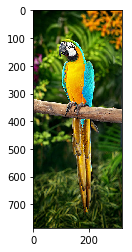

In [9]:
classify_image("images/parrot.jpg", "resnet")

1. macaw: 99.98%
2. lorikeet: 0.00%
3. peacock: 0.00%
4. sulphur-crested_cockatoo: 0.00%
5. toucan: 0.00%


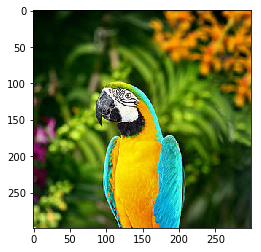

In [10]:
classify_image("images/parrot_cropped1.jpg", "resnet")

1. comic_book: 99.76%
2. book_jacket: 0.19%
3. jigsaw_puzzle: 0.05%
4. menu: 0.00%
5. packet: 0.00%


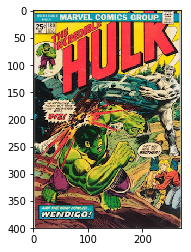

In [11]:
classify_image("images/incredible-hulk-180.jpg", "resnet")

1. giant_panda: 99.04%
2. indri: 0.59%
3. lesser_panda: 0.17%
4. gibbon: 0.07%
5. titi: 0.05%


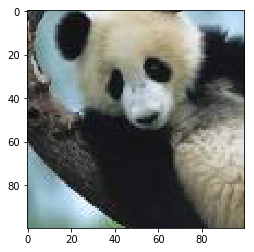

In [12]:
classify_image("images/cropped_panda.jpg", "resnet")

1. space_shuttle: 92.38%
2. triceratops: 7.15%
3. warplane: 0.11%
4. cowboy_hat: 0.10%
5. sombrero: 0.04%


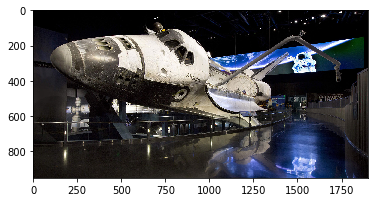

In [13]:
classify_image("images/space-shuttle1.jpg", "resnet")

1. space_shuttle: 99.96%
2. missile: 0.03%
3. projectile: 0.00%
4. steam_locomotive: 0.00%
5. warplane: 0.00%


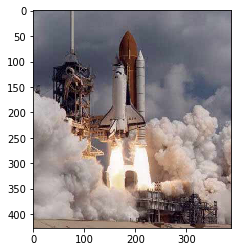

In [14]:
classify_image("images/space-shuttle2.jpg", "resnet")

1. space_shuttle: 93.21%
2. missile: 5.53%
3. projectile: 1.26%
4. mosque: 0.00%
5. beacon: 0.00%


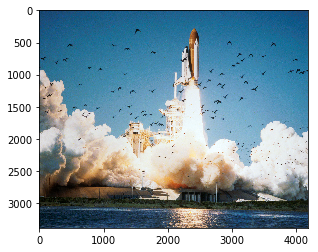

In [15]:
classify_image("images/space-shuttle3.jpg", "resnet")

1. space_shuttle: 49.61%
2. castle: 8.17%
3. crane: 6.46%
4. missile: 4.62%
5. aircraft_carrier: 4.24%


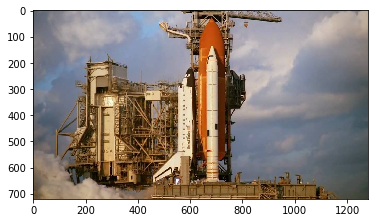

In [16]:
classify_image("images/space-shuttle4.jpg", "resnet")

In [17]:
def print_model(model):
    print ("Model:",model)
    Network = MODELS[model][0]
    model = Network(weights="imagenet")
    model.summary()

In [18]:
print_model('vgg16')

('Model:', 'vgg16')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0

In [19]:
print_model('vgg19')

('Model:', 'vgg19')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0

In [20]:
print_model('inception')

('Model:', 'inception')
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_15 (InputLayer)            (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_99 (Conv2D)               (None, 149, 149, 32)  864         input_15[0][0]                   
____________________________________________________________________________________________________
batch_normalization_99 (BatchNor (None, 149, 149, 32)  96          conv2d_99[0][0]                  
____________________________________________________________________________________________________
activation_487 (Activation)      (None, 149, 149, 32)  0           batch_normalization_99[0][0]     
___________________________________________________________________

In [21]:
print_model('xception')

('Model:', 'xception')
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_16 (InputLayer)            (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 149, 149, 32)  864         input_16[0][0]                   
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 149, 149, 32)  128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 149, 149, 32)  0           block1_conv1_bn[0][0]            
____________________________________________________________________

In [22]:
print_model('resnet')

('Model:', 'resnet')
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_17 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_9 (ZeroPadding2D) (None, 230, 230, 3)   0           input_17[0][0]                   
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_9[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
______________________________________________________________________

In [23]:
def image_load(image_path):

    pil_im = Image.open(image_path, 'r')
    pil_im.show()

In [24]:
image_load('images/imagenet_vggnet_table1.png')

In [25]:
image_load('images/imagenet_resnet_identity.png')

In [26]:
image_load('images/imagenet_xception_flow.png')

In [27]:
image_load('images/imagenet_resnet_identity.png')

In [28]:
image_load('images/imagenet_resnet_residual.png')

In [29]:
#inception v4 is a separate module